## 🔰 *============= Getting Started =============== *🔰
### Tensorflow Fundamentals 04.22

In [ ]:
#--Import Tensorflow:
import tensorflow as tf
print(tf.__version__)


2.8.0


## 🔰*========== What is a Tensor? ============*🔰
##Descriptions: 
####*Scalar:* 0-D Array of Numbers   (Single Number)
####*Vector:* 1-D Array of Numbers   (Number w/ Direction)
####*Matrix:* 2-D Array of numbers   (Matrix of Vectors)
####*Tensor:* n-Dim Array of Numbers (Pages of Matrices)

In [ ]:
#--Creating a constant      
scalar = tf.constant(7)
print(scalar)
scalar

tf.Tensor(7, shape=(), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#---Creating a vector
vector = tf.constant([10,10])
print(vector)
vector

tf.Tensor([10 10], shape=(2,), dtype=int32)


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#--Creating a matrix:
matrix = tf.constant([[1,2],
                      [3,4]])

In [ ]:
#---Specifying the Datatype:
tensor = tf.constant([[[1.0,2.0],
                       [3.0,4.0]],
                       [[5.0,6.0],
                        [7.0,8.0]]], dtype=tf.float16)
print(tensor)

tf.Tensor(
[[[1. 2.]
  [3. 4.]]

 [[5. 6.]
  [7. 8.]]], shape=(2, 2, 2), dtype=float16)


In [ ]:
#--Check the number of dimensions:
print("object   Ndims   Shape\n------------------------------")
print(f"Scalar:   {scalar.ndim}     {scalar.shape}")      #Single Number
print(f"Vector:   {vector.ndim}     {vector.shape}")      #Number & Direction
print(f"Matrix:   {matrix.ndim}     {matrix.shape}")      #2-dim array
print(f"Tensor:   {tensor.ndim}     {tensor.shape}")      #3-dim array

object   Ndims   Shape
------------------------------
Scalar:   0     ()
Vector:   1     (2,)
Matrix:   2     (2, 2)
Tensor:   3     (2, 2, 2)


### 🔰*=============================== Assignment =================================*🔰

### Constant vs Variable Tensors

In [ ]:
#----Constant vs Variable Tensors:
tensor_constant = tf.constant([1,2])
tensor_variable = tf.Variable([1,2])
print(tensor_constant)
print(tensor_variable)

tf.Tensor([1 2], shape=(2,), dtype=int32)
<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>


In [ ]:
#---Cannot Assign: Leads to an error 
tensor_constant[1].assign(0)

AttributeError: ignored

In [ ]:
#---Values Reassignable
tensor_variable[1].assign(0)
print(tensor_variable)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 0], dtype=int32)>


## 🔰*===================== Creating (pseudo) Random Tensors ===========================*🔰

In [ ]:
#------Random tensors: elements filled with random numbers

#---Create a generator: 
Generator_random = tf.random.Generator.from_seed(42)      #Setting seed allows reproducable results
print(Generator_random,"\n")

#---Create tensor:
rtensor_uniform = Generator_random.uniform(shape=(3,2))      #Uniform (Constant) Distribution
print(rtensor_uniform,"\n")

rtensor_normal = Generator_random.normal(shape = (3,2))         #Normal (Gaussian) Distribution
print(rtensor_normal)


tf.Tensor(
[[0.7493447  0.73561966]
 [0.45230794 0.49039817]
 [0.1889317  0.52027524]], shape=(3, 2), dtype=float32) 

tf.Tensor(
[[ 0.17522676  0.71105534]
 [ 0.54882437  0.14896016]
 [-0.54757965  0.61634356]], shape=(3, 2), dtype=float32)


## 🔰*=============================== Shuffling Tensors ============================*🔰

In [ ]:
tensor_2shuffle = tf.constant([[1,2,3],
                               [4,5,6],
                               [7,8,9],
                               [10,11,12]])
print(tensor_2shuffle)

tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]], shape=(4, 3), dtype=int32)


In [ ]:
#----Setting the Global Random Seed:
tf.random.set_seed(42)

#----Setting the Local/Operational Random Seed:
tensor_shuffled = tf.random.shuffle(tensor_2shuffle,seed=314)
print(tensor_shuffled)

#---Both the Global & Operational

tf.Tensor(
[[ 7  8  9]
 [10 11 12]
 [ 4  5  6]
 [ 1  2  3]], shape=(4, 3), dtype=int32)


[Reproducable Results](https://www.tensorflow.org/api_docs/python/tf/random/set_seed): 

Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed.

Its interactions with operation-level seeds is as follows:



*   If neither the global seed nor the operation seed is set: A randomly picked seed is used for this op.
*   If the global seed is set, but the operation seed is not: The system deterministically picks an operation seed in conjunction with the global seed so that it gets a unique random sequence. Within the same version of tensorflow and user code, this sequence is deterministic. However across different versions, this sequence might change. If the code depends on particular seeds to work, specify both global and operation-level seeds explicitly.

*   If the operation seed is set, but the global seed is not set: A default global seed and the specified operation seed are used to determine the random sequence.

*   **If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence**.

## 🔰*======================== Ways of Making Tensors ============================*🔰

In [ ]:
#----Tensor of Zeros:
tensor_zeros = tf.zeros(shape = (3,3))
print(tensor_zeros)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [ ]:
#-----tensors of Ones:
tensor_ones = tf.ones(shape = (3,3))
print(tensor_ones)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [ ]:
#------From a numpy array:
import numpy as np
np_array = np.arange(1,25,dtype = np.int64)
print(np_array)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [ ]:
#----Without Reshaping:
tensor_from_npArray = tf.constant(np_array)
print(tensor_from_npArray,'\n')

#---With Reshaping
tensor_from_npArray = tf.constant(np_array,shape = (2,3,4))
print(tensor_from_npArray,'\n')

tensor_from_npArray = tf.reshape(tensor_from_npArray,shape = (2,3,4))
print(tensor_from_npArray)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], shape=(24,), dtype=int64) 

tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int64) 

tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int64)


## 🔰*======================== Squeezing Tensors============================*🔰

In [ ]:
#---------- Tensor with many size 1 dimensions:
A = tf.constant(tf.random.uniform(shape=(50,)),
                shape = (1,1,1,1,50))
print(A.shape)
print(A)

(1, 1, 1, 1, 50)
tf.Tensor(
[[[[[0.6645621  0.44100678 0.3528825  0.46448255 0.03366041 0.68467236
     0.74011743 0.8724445  0.22632635 0.22319686 0.3103881  0.7223358
     0.13318717 0.5480639  0.5746088  0.8996835  0.00946367 0.5212307
     0.6345445  0.1993283  0.72942245 0.54583454 0.10756552 0.6767061
     0.6602763  0.33695042 0.60141766 0.21062577 0.8527372  0.44062173
     0.9485276  0.23752594 0.81179297 0.5263394  0.494308   0.21612847
     0.8457197  0.8718841  0.3083862  0.6868038  0.23764038 0.7817228
     0.9671384  0.06870162 0.79873943 0.66028714 0.5871513  0.16461694
     0.7381023  0.32054043]]]]], shape=(1, 1, 1, 1, 50), dtype=float32)


In [ ]:
#------ Removes size 1 dimensions:
A_squeezed = tf.squeeze(A)
print(A_squeezed.shape)
print(A_squeezed)


(50,)
tf.Tensor(
[0.6645621  0.44100678 0.3528825  0.46448255 0.03366041 0.68467236
 0.74011743 0.8724445  0.22632635 0.22319686 0.3103881  0.7223358
 0.13318717 0.5480639  0.5746088  0.8996835  0.00946367 0.5212307
 0.6345445  0.1993283  0.72942245 0.54583454 0.10756552 0.6767061
 0.6602763  0.33695042 0.60141766 0.21062577 0.8527372  0.44062173
 0.9485276  0.23752594 0.81179297 0.5263394  0.494308   0.21612847
 0.8457197  0.8718841  0.3083862  0.6868038  0.23764038 0.7817228
 0.9671384  0.06870162 0.79873943 0.66028714 0.5871513  0.16461694
 0.7381023  0.32054043], shape=(50,), dtype=float32)


## 🔰*======================== Tensor Attributes ============================*🔰



In [ ]:
#----Rank:
print(f"Rank: {tensor_from_npArray.ndim}")

#----Size:
print(f"Size: {tf.size(tensor_from_npArray)}")

#----Shape:
print(f"Shape: {tensor_from_npArray.shape}")

#----DataType:
print(f"Dtype: {tensor_from_npArray.dtype}")

#----Slice
print(f"\nSlice:\n{tensor_from_npArray[:,0:2,1:3]}")

Rank: 3
Size: 24
Shape: (2, 3, 4)
Dtype: <dtype: 'int64'>

Slice:
[[[ 2  3]
  [ 6  7]]

 [[14 15]
  [18 19]]]


## 🔰*======================== Indexing Tensors ============================*🔰

In [ ]:
print(tensor_from_npArray)

tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int64)


In [ ]:
#---First element in the first vector in the first page
page = 0
vector = 0
element = 0
tensor_from_npArray[page,vector,element]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
#----Slicing:
pages = slice(0,2)
vectors = slice(1,3)
elements = slice(-3,-1)
tensor_from_npArray[pages,vectors,elements]

<tf.Tensor: shape=(2, 2, 2), dtype=int64, numpy=
array([[[ 6,  7],
        [10, 11]],

       [[18, 19],
        [22, 23]]])>

In [ ]:
#---Adding a new Axis:
tensor_from_npArray[..., tf.newaxis]

<tf.Tensor: shape=(2, 3, 4, 1), dtype=int64, numpy=
array([[[[ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8]],

        [[ 9],
         [10],
         [11],
         [12]]],


       [[[13],
         [14],
         [15],
         [16]],

        [[17],
         [18],
         [19],
         [20]],

        [[21],
         [22],
         [23],
         [24]]]])>

In [ ]:
#---Adding a new Axis:
tf.expand_dims(tensor_from_npArray,axis = -1)

<tf.Tensor: shape=(2, 3, 4, 1), dtype=int64, numpy=
array([[[[ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8]],

        [[ 9],
         [10],
         [11],
         [12]]],


       [[[13],
         [14],
         [15],
         [16]],

        [[17],
         [18],
         [19],
         [20]],

        [[21],
         [22],
         [23],
         [24]]]])>

In [ ]:
#---Adding a new Axis:
tf.expand_dims(tensor_from_npArray,axis = 0)

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int64, numpy=
array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]]])>

## 🔰*======================== Basic Tensor Operations ============================*🔰

In [ ]:
#-----Square Matrix
tensor = tf.constant([[1,2],
                      [3,4]])

In [ ]:
print("#---- Opperations w/ Constant:")
print(tensor + 10,'\n')
print(tensor - 10,'\n')
print(tensor * 10,'\n')
print(tensor / 10,'\n')


print("#---- Using Tensorflow functions:")
print(tf.add(tensor,10),'\n')
print(tf.subtract(tensor,10),'\n')
print(tf.multiply(tensor,10),'\n')
print(tf.divide(tensor,10),'\n')

#---- Opperations w/ Constant:
tf.Tensor(
[[11 12]
 [13 14]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[-9 -8]
 [-7 -6]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[10 20]
 [30 40]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[0.1 0.2]
 [0.3 0.4]], shape=(2, 2), dtype=float64) 

#---- Using Tensorflow functions:
tf.Tensor(
[[11 12]
 [13 14]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[-9 -8]
 [-7 -6]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[10 20]
 [30 40]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[0.1 0.2]
 [0.3 0.4]], shape=(2, 2), dtype=float64) 



## 🔰*======================== More Tensors Operations============================*🔰

In [ ]:
A = tf.range(1,10,dtype='float64')    
print(A,'\n')

A2 = tf.square(A)
print(A2,'\n')

Asqrt = tf.sqrt(A)
print(Asqrt,'\n')

Alog = tf.math.log(A)
print(Alog)

tf.Tensor([1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(9,), dtype=float64) 

tf.Tensor([ 1.  4.  9. 16. 25. 36. 49. 64. 81.], shape=(9,), dtype=float64) 

tf.Tensor(
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.        ], shape=(9,), dtype=float64) 

tf.Tensor(
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458], shape=(9,), dtype=float64)


## 🔰*======================== General Tensor Operations ============================*🔰

In [ ]:
#--------------------------------------------- Square Matrix
print(tensor,'\n')
print("#---- Opperations:")
print(tensor * tensor,'\n')                        #Hadamard Product
print(tensor @ tensor,'\n')                        #Dot Product

print("#---- Using Tensorflow functions:")
print(tf.multiply(tensor,tensor),'\n')             #Hadamard Product
print(tf.matmul(tensor,tensor),'\n')               #Dot Product
print(tf.tensordot(tensor,tensor,axes = 1),'\n')   #Dot Product
print(tf.tensordot(tensor,tensor,axes = 0))        #Outer Product

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

#---- Opperations:
tf.Tensor(
[[ 1  4]
 [ 9 16]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[ 7 10]
 [15 22]], shape=(2, 2), dtype=int32) 

#---- Using Tensorflow functions:
tf.Tensor(
[[ 1  4]
 [ 9 16]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[ 7 10]
 [15 22]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[ 7 10]
 [15 22]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[[[ 1  2]
   [ 3  4]]

  [[ 2  4]
   [ 6  8]]]


 [[[ 3  6]
   [ 9 12]]

  [[ 4  8]
   [12 16]]]], shape=(2, 2, 2, 2), dtype=int32)


In [ ]:
#--------------------------------------------- General Matrix:
tensor32 = tf.constant([[1,2],
                        [3,4],
                        [5,6]])

#--Using Reshape: 
tensor23 = tf.reshape(tensor32,
                      shape = (2,3))

#--Using Transpose:
tensor32_t = tf.transpose(tensor32)

print(tensor32.shape) #(3,2)
print(tensor32,'\n')

print(tensor23.shape) #(2,3)
print(tensor23,'\n')  #Reshaped

print(tensor32_t.shape) #(2,3)
print(tensor32_t)     #transposed


#---Note: Reshape & Transpose are different opperations and in general do not give identical results

(3, 2)
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32) 

(2, 3)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) 

(2, 3)
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int32)


In [ ]:
#---- 3x2 @ 2x3 = 3x3 tensor
tensor33 = tf.matmul(tensor32,tensor23)               #Dot product requires rows of Tensor A, to be the same as cols of Tensor B

#---Results:
print(tensor33.shape,'\n')
print(tensor33,'\n')

#---Dot Product:
print(tf.tensordot(tensor32,tensor23,axes=1),'\n') 


#--Outer Products: 
print(tf.tensordot(tensor32,tensor23,axes=0),'\n')    #Different Shapes
print(tf.tensordot(tensor32,tensor32,axes=0))         #Same Shapes

(3, 3) 

tf.Tensor(
[[ 9 12 15]
 [19 26 33]
 [29 40 51]], shape=(3, 3), dtype=int32) 

tf.Tensor(
[[ 9 12 15]
 [19 26 33]
 [29 40 51]], shape=(3, 3), dtype=int32) 

tf.Tensor(
[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 2  4  6]
   [ 8 10 12]]]


 [[[ 3  6  9]
   [12 15 18]]

  [[ 4  8 12]
   [16 20 24]]]


 [[[ 5 10 15]
   [20 25 30]]

  [[ 6 12 18]
   [24 30 36]]]], shape=(3, 2, 2, 3), dtype=int32) 

tf.Tensor(
[[[[ 1  2]
   [ 3  4]
   [ 5  6]]

  [[ 2  4]
   [ 6  8]
   [10 12]]]


 [[[ 3  6]
   [ 9 12]
   [15 18]]

  [[ 4  8]
   [12 16]
   [20 24]]]


 [[[ 5 10]
   [15 20]
   [25 30]]

  [[ 6 12]
   [18 24]
   [30 36]]]], shape=(3, 2, 3, 2), dtype=int32)


## 🔰*======================== Changing Tensor Datatypes ============================*🔰

In [ ]:
A = tf.constant([1.0,2.0])    #---Default datatype: 'float32'
B = tf.constant([1,2])        #---Default datatype: 'int32'

print(A.dtype)
print(B.dtype)

<dtype: 'float32'>
<dtype: 'int32'>


In [ ]:
#-----Casting to another datatype:
A = tf.cast(A,
            dtype = tf.float16)

print(A.dtype)

B = tf.cast(B,
            dtype = tf.int16)
print(B.dtype)

<dtype: 'float16'>
<dtype: 'int16'>


[Tensorflow Mixed Precision](https://www.tensorflow.org/guide/mixed_precision?msclkid=6595062ac67211ec945aa810c2e48d39)

**Mixed precision uses both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory**. 

* By keeping certain parts of the model in the 32-bit types for numeric stability, the model will have a lower step time and train equally as well in terms of the evaluation metrics such as accuracy. 

* Keras mixed precision API is used to speed up your models. Using this API can improve performance by more than 3 times on modern GPUs and 60% on TPUs.

**Modern accelerators can run operations faster in the 16-bit dtypes, as they have specialized hardware to run 16-bit computations and 16-bit dtypes can be read from memory faster.**
  * Today, most models use the float32 dtype. 
  * There are two lower-precision dtypes, float16 and bfloat16, which take 16 bits of memory instead.

**NVIDIA GPUs can run operations in float16 faster than in float32, and TPUs can run operations in bfloat16 faster than float32.** 
* These lower-precision dtypes should be used whenever possible on those devices. 
* Variables and a few computations should still be in float32 for numeric reasons so that the model trains to the same quality. 
*The Keras mixed precision API allows you to use a mix of either float16 or bfloat16 with float32, to get the performance benefits from float16/bfloat16 and the numeric stability benefits from float32.

[NVIDIA](https://developer.nvidia.com/blog/cuda-11-features-revealed/?msclkid=40f6c17dc67311ec899aed68a0a22ddd)

**CUDA 11 adds support for the new input data type formats: Bfloat16, TF32, and FP64.** 
* Bfloat16 is an alternate FP16 format but with reduced precision that matches the FP32 numerical range. Its usage results in lower bandwidth and storage requirements and therefore higher throughput. 
* Bfloat16 is exposed as a new CUDA C++ __nv_bfloat16 data type in cuda_bf16.h

**TF32 is the default math mode to allow you to get speedups over FP32 for DL training, without any changes to models.**
* TF32 is a special floating-point format meant to be used with Tensor Cores. 
* TF32 includes an 8-bit exponent (same as FP32), 10-bit mantissa (same precision as FP16), and one sign-bit.



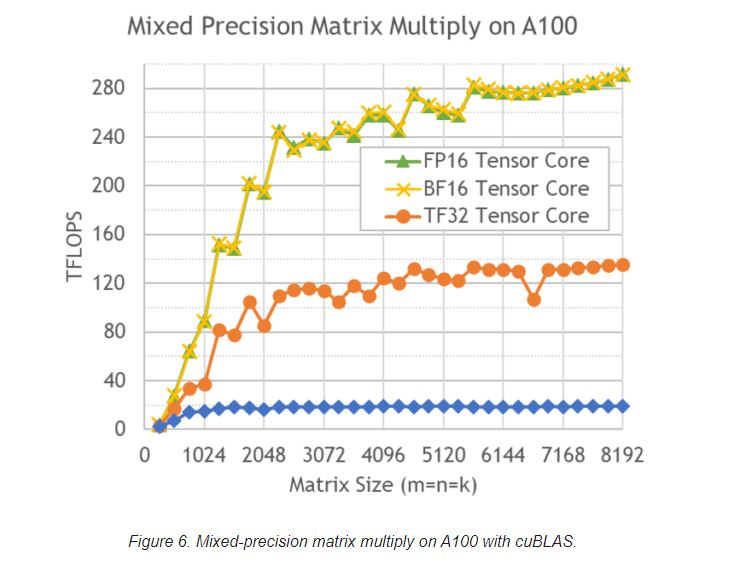

[Wiki: bfloat16 floating-point format](https://en.wikipedia.org/wiki/Bfloat16_floating-point_format)


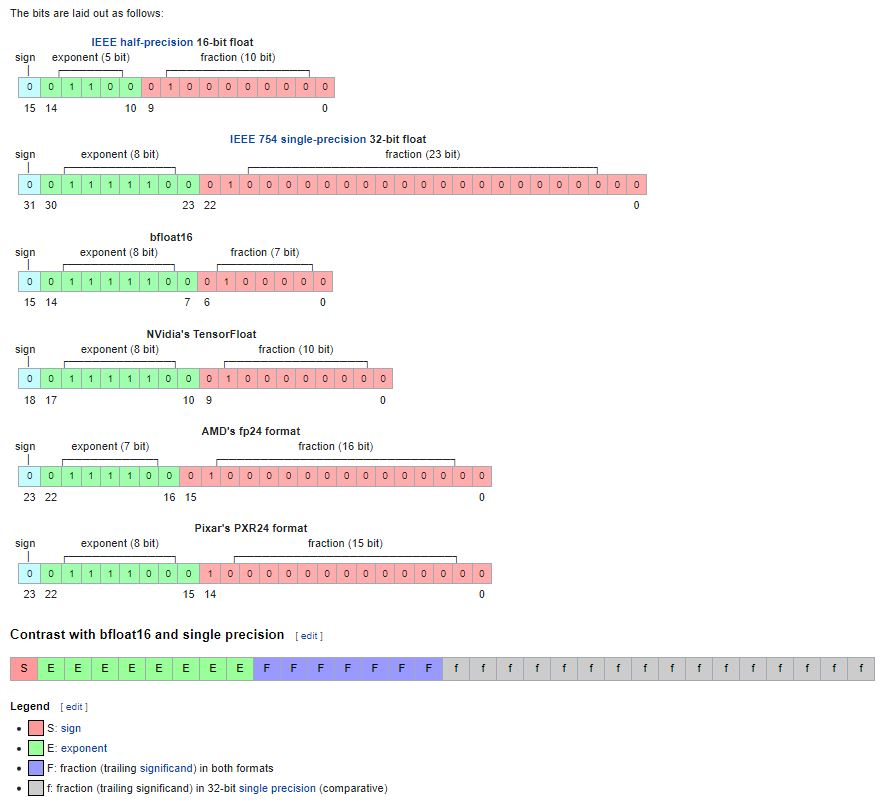

## 🔰*======================== Aggregating Tensors============================*🔰

In [ ]:
A = tf.constant(np.random.randint(-100,100,size = 50))
print(A)
print(tf.abs(A))

tf.Tensor(
[ 16  82  61 -60   9  17 -83  93  51  24 -54 -33 -47  60 -69  -2 -67  10
 -33 -49  45  38 -13 -61   2  85  14 -23 -88  62  31 -87  80  50  83  66
  69 -97 -13 -32  89  87 -64 -40  98  73 -48 -26  -3 -23], shape=(50,), dtype=int64)
tf.Tensor(
[16 82 61 60  9 17 83 93 51 24 54 33 47 60 69  2 67 10 33 49 45 38 13 61
  2 85 14 23 88 62 31 87 80 50 83 66 69 97 13 32 89 87 64 40 98 73 48 26
  3 23], shape=(50,), dtype=int64)


In [ ]:
print("Min: ",tf.reduce_min(A))
print("Max: ",tf.reduce_max(A))
print("Avg: ",tf.reduce_mean(A))
print("Sum: ",tf.reduce_sum(A))

Min:  tf.Tensor(-97, shape=(), dtype=int64)
Max:  tf.Tensor(98, shape=(), dtype=int64)
Avg:  tf.Tensor(5, shape=(), dtype=int64)
Sum:  tf.Tensor(280, shape=(), dtype=int64)


In [ ]:
#---- Calculate Variance & Std 'by hand'
A_avg = tf.reduce_mean(A)
A_var = tf.reduce_sum(tf.divide(tf.pow(tf.subtract(A,A_avg),
                                       2),
                                tf.cast(tf.size(A),
                                        dtype = 'int64')))
A_std = tf.pow(A_var,0.5)

print('Tensor Variance: {0:7.3f}'.format(A_var))
print('Tensor Std: {0:5.3f}\n'.format(A_std))


#---- Use TF built in
A_std = tf.math.reduce_std(tf.cast(A,dtype = 'float64'))
A_var = tf.pow(A_std,2)
print('Tensor Variance: {0:7.3f}'.format(A_var))
print('Tensor Std: {0:5.3f}\n'.format(A_std))

#---- Using TF module
import tensorflow_probability as tfp
A_var = tfp.stats.variance(A)
A_std = tfp.stats.stddev(tf.cast(A,dtype = 'float64'))
print('Tensor Variance: {0:7.3f}'.format(A_var))
print('Tensor Std: {0:5.3f}\n'.format(A_std))

Tensor Variance: 3301.400
Tensor Std: 57.458

Tensor Variance: 3301.040
Tensor Std: 57.455

Tensor Variance: 3301.000
Tensor Std: 57.455



In [ ]:
#----- Finding Positional min/max
tf.random.set_seed(123)
A = tf.random.uniform(shape=[50])
print(A)

tf.Tensor(
[1.2615311e-01 5.7275128e-01 2.9931331e-01 5.4618359e-01 7.2051573e-01
 7.8895330e-01 3.0768120e-01 4.8171103e-01 6.5377522e-01 1.2099254e-01
 3.6291742e-01 2.4489999e-01 2.2695613e-01 5.2010036e-01 8.6846626e-01
 2.8618944e-01 4.9184704e-01 6.7498839e-01 4.4017053e-01 4.8929918e-01
 8.0563521e-01 8.9742839e-01 6.3661599e-01 5.0120056e-01 4.8389077e-01
 7.5225627e-01 8.0648589e-01 4.9031341e-01 4.1761780e-01 9.1975069e-01
 3.0427229e-01 9.1212058e-01 6.4861798e-01 3.4877110e-01 6.5847862e-01
 8.3783138e-01 8.0430543e-01 3.5812950e-01 3.9926910e-01 4.8551953e-01
 8.2470536e-02 4.2112601e-01 3.1805038e-03 9.8808622e-01 5.6935668e-01
 1.5285087e-01 5.8680832e-01 9.9560010e-01 7.5173378e-04 5.5387068e-01], shape=(50,), dtype=float32)


In [ ]:
#--- Max
print('Position of max: ', tf.argmax(A))
print('Value of max: ', A[tf.argmax(A)])

#--- Min
print('\nPosition of min: ', tf.argmin(A))
print('Value of min: ', A[tf.argmin(A)])

Position of max:  tf.Tensor(47, shape=(), dtype=int64)
Value of max:  tf.Tensor(0.9956001, shape=(), dtype=float32)

Position of min:  tf.Tensor(48, shape=(), dtype=int64)
Value of min:  tf.Tensor(0.0007517338, shape=(), dtype=float32)


## 🔰*======================== One-Hot Encoding Tensors============================*🔰

In [ ]:
#-----Create a list
a_list = [0,1,2,3]
d = len(a_list)

#-----One Hot Encode
ohe_a_list = tf.one_hot(a_list, depth = d-1)
print('Under Encoding\n',ohe_a_list)

ohe_a_list = tf.one_hot(a_list, depth = d)
print('\nExact Encoding\n',ohe_a_list)

ohe_a_list = tf.one_hot(a_list, depth = d+1)
print('\nOver Encoding\n',ohe_a_list)



Under Encoding
 tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)

Exact Encoding
 tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)

Over Encoding
 tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]], shape=(4, 5), dtype=float32)


In [ ]:
#----- Providing alternate values for OHE
print(tf.one_hot(a_list, depth = 4,
                 on_value = 1,
                 off_value = -1))           #Alternate Numbers

print('\n',tf.one_hot(a_list, depth = 4,
                 on_value = "+",
                 off_value = "-"))          #Non-Numeric



tf.Tensor(
[[ 1 -1 -1 -1]
 [-1  1 -1 -1]
 [-1 -1  1 -1]
 [-1 -1 -1  1]], shape=(4, 4), dtype=int32)

 tf.Tensor(
[[b'+' b'-' b'-' b'-']
 [b'-' b'+' b'-' b'-']
 [b'-' b'-' b'+' b'-']
 [b'-' b'-' b'-' b'+']], shape=(4, 4), dtype=string)


## 🔰*======================== TF & Numpy Compatibility ============================*🔰

In [ ]:
#---- npArray -> Tensor
a_list = [1.,2.,3.]
A = tf.constant(np.array(a_list))
print(A)

#--- Tensor -> npArray : using np
B = np.array(A)
print(type(B),': ',B)

#--- Tensor -> npArray : using tf
B = A.numpy()
print(type(B),': ',B)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
<class 'numpy.ndarray'> :  [1. 2. 3.]
<class 'numpy.ndarray'> :  [1. 2. 3.]


In [ ]:
#--- Note: Default types of Numpy & TF are different
C = tf.constant(a_list)
D = np.array(a_list)
E = np.array(C)

print('TF dtype: ', C.dtype)
print('np dtype: ', D.dtype)
print('\ndtype np -> tf: ', A.dtype)
print('dtype tf -> np: ', E.dtype)

TF dtype:  <dtype: 'float32'>
np dtype:  float64

dtype np -> tf:  <dtype: 'float64'>
dtype tf -> np:  float32


## 🔰*======================== Using GPUs ============================*🔰

🔑**Note:** if runtime has access to CUDA-enabled GPU, Tensorflow will automatically use it whenever possible

In [ ]:
#----- Before Changing Colab Runtime type:
tf.config.list_physical_devices()[0]      #CPU only

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

In [ ]:
#---- After Changing Colab Runtime type:
tf.config.list_physical_devices()         #CPU & GPU

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#----- GPU type:
!nvidia-smi

Thu Apr 28 03:12:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    69W / 149W |    147MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------